In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

######### 윈도우에 맞게 경로 재설정!!!!!!############
font_name = fm.FontProperties(fname="/Users/hakyeong/Library/Fonts/NanumSquareOTFRegular.otf").get_name()
plt.rc("font", family=font_name)

In [15]:
data= pd.read_csv('Data/pre_train.csv', encoding = 'euc-kr')
data

,Unnamed: 0,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
1,9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
2,10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
3,11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
4,12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,2947,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0
2865,2948,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0
2866,2949,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0
2867,2950,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0


In [38]:
data2 = data.drop_duplicates(['단지코드'])
data2

,Unnamed: 0,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
7,15,C1407,1216,아파트,대전광역시,30.95,288,13.0,127350,1.0,1.0,1285.0,1064.0
18,26,C1945,755,아파트,경기도,39.72,120,6.0,130070,1.0,3.0,734.0,730.0
24,32,C1470,696,아파트,전라북도,36.55,228,14.0,102130,0.0,2.0,645.0,553.0
28,36,C1898,566,아파트,전라북도,36.55,230,9.0,102130,0.0,6.0,517.0,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,2932,C2586,90,아파트,제주특별자치도,16.64,12,7.0,71400,0.0,3.0,66.0,57.0
2854,2937,C2035,492,아파트,강원도,29.53,132,24.0,117000,0.0,1.0,521.0,246.0
2859,2942,C2020,40,아파트,부산광역시,16.80,20,7.0,87000,1.0,2.0,25.0,19.0
2862,2945,C2437,90,아파트,충청북도,24.83,90,12.0,107530,0.0,1.0,30.0,16.0


In [48]:
data_sub = data2[['단지코드', '노선수', '버스', '등록차량수']]
data_sub

,단지코드,노선수,버스,등록차량수
0,C2515,0.0,3.0,205.0
7,C1407,1.0,1.0,1064.0
18,C1945,1.0,3.0,730.0
24,C1470,0.0,2.0,553.0
28,C1898,0.0,6.0,415.0
...,...,...,...,...
2849,C2586,0.0,3.0,57.0
2854,C2035,0.0,1.0,246.0
2859,C2020,1.0,2.0,19.0
2862,C2437,0.0,1.0,16.0


In [49]:
data_sub['지하철수+정류장수'] = (data_sub['노선수'] + data_sub['버스'])
data_sub


<ipython-input-49-ed277d54e246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['지하철수+정류장수'] = (data_sub['노선수'] + data_sub['버스'])


,단지코드,노선수,버스,등록차량수,지하철수+정류장수
0,C2515,0.0,3.0,205.0,3.0
7,C1407,1.0,1.0,1064.0,2.0
18,C1945,1.0,3.0,730.0,4.0
24,C1470,0.0,2.0,553.0,2.0
28,C1898,0.0,6.0,415.0,6.0
...,...,...,...,...,...
2849,C2586,0.0,3.0,57.0,3.0
2854,C2035,0.0,1.0,246.0,1.0
2859,C2020,1.0,2.0,19.0,3.0
2862,C2437,0.0,1.0,16.0,1.0


In [50]:
data_sub = data_sub.sort_values('지하철수+정류장수', ascending = True)
data_sub

,단지코드,노선수,버스,등록차량수,지하철수+정류장수
681,C1519,0.0,0.0,235.0,0.0
2863,C2532,0.0,1.0,146.0,1.0
2613,C1357,0.0,1.0,995.0,1.0
1874,C1227,0.0,1.0,823.0,1.0
512,C1672,0.0,1.0,873.0,1.0
...,...,...,...,...,...
1766,C1268,0.0,16.0,934.0,16.0
2333,C1136,0.0,19.0,763.0,19.0
1121,C2094,0.0,20.0,318.0,20.0
2387,C1636,0.0,20.0,946.0,20.0


<AxesSubplot:xlabel='지하철수+정류장수'>

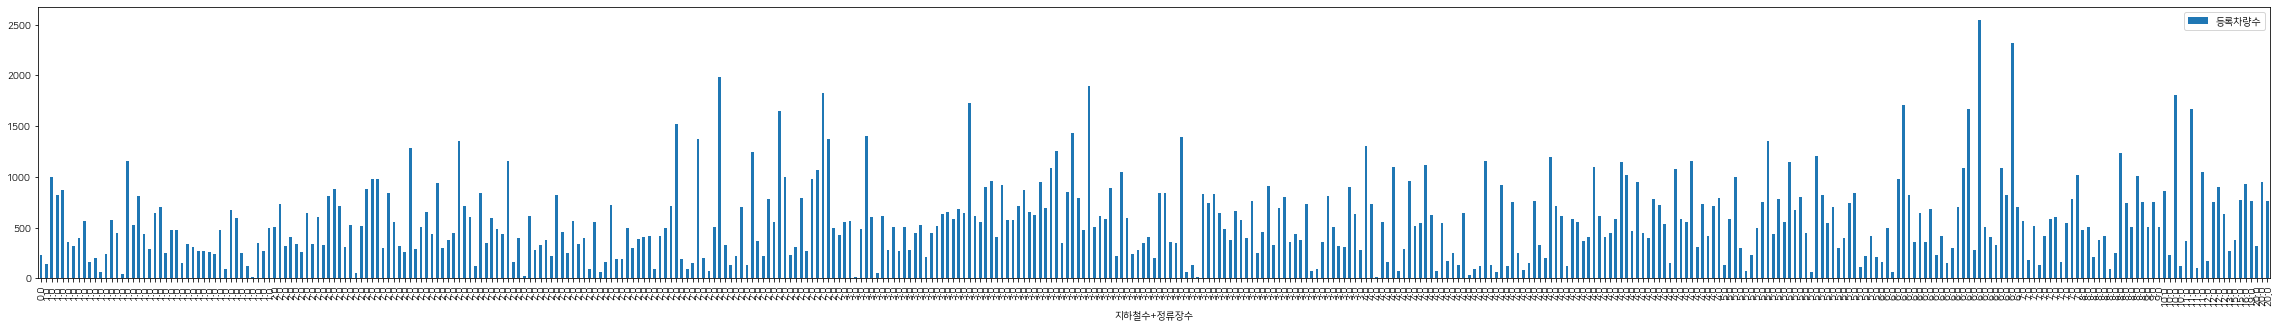

In [51]:
data_sub.plot(kind = 'bar', x = '지하철수+정류장수', y = '등록차량수', stacked = False, figsize = (40, 5))

#산점도로 바꿔보기 

<AxesSubplot:xlabel='지하철수+정류장수', ylabel='등록차량수'>

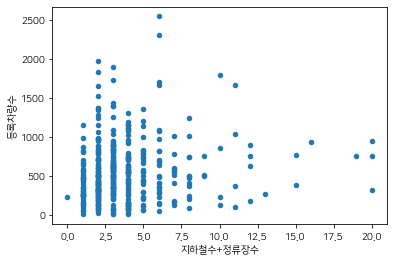

In [52]:
data_sub.plot.scatter('지하철수+정류장수', '등록차량수')

In [ ]:
#지하철수 정류장수